<a href="https://colab.research.google.com/github/pansimatel21/Forecasting_using_Time_Series_Analysis/blob/main/Graded_Assignment_2_Mansi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd 
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
from sklearn.impute import SimpleImputer
import warnings, scipy, statsmodels
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = 16, 3

In [3]:
# Reading the file using Pathlib function
filepath_1 = Path('/content/machine_temp_failure_missing.csv')
filepath_2 = Path('/content/machine_temp_failure_original.csv')

In [4]:
Data_Missing = pd.read_csv(filepath_1)
Data_Original = pd.read_csv(filepath_2)


In [6]:
Data_Missing.head()

,timestamp,value
0,02-12-2013 21:15,73.967322
1,02-12-2013 21:20,74.935882
2,02-12-2013 21:25,76.124162
3,02-12-2013 21:30,78.140707
4,02-12-2013 21:35,79.329836


In [7]:
Data_Original.head()

,timestamp,value
0,2013-12-02 21:15:00,73.967322
1,2013-12-02 21:20:00,74.935882
2,2013-12-02 21:25:00,76.124162
3,2013-12-02 21:30:00,78.140707
4,2013-12-02 21:35:00,79.329836


In [8]:
# checking the dtype of timestamp and value column entries
Data_Missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22695 entries, 0 to 22694
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  22695 non-null  object 
 1   value      21410 non-null  float64
dtypes: float64(1), object(1)
memory usage: 354.7+ KB


In [9]:
#checking if there is any missing value or not
Missing_Values_1 = Data_Missing.isnull().sum()
Missing_Values_2 = Data_Original.isnull().sum()


In [10]:
#getting the sum of miaaing vallues from both the datasets
print(Missing_Values_1)
print(Missing_Values_2)

timestamp       0
value        1285
dtype: int64
timestamp    0
value        0
dtype: int64


In [11]:
#Calculating Mean,Max,Min of missing dataset
Data_Missing.describe()

,value
count,21410.000000
mean,85.968188
std,13.553070
min,2.084721
25%,83.082867
50%,89.251290
75%,93.910748
max,108.510543


In [12]:
#Calculating Mean,Max,Min of Original dataset of machine temp failure
Data_Original.describe()

,value
count,22695.000000
mean,85.926498
std,13.746912
min,2.084721
25%,83.080078
50%,89.408246
75%,94.016252
max,108.510543


In [13]:
#Rename the value column to temperature. 
Data_Missing = Data_Missing.rename(columns={'value': 'temperature'})
Data_Original = Data_Original.rename(columns={'value': 'temperature'})

In [14]:
#Creating a new feature delta_temperature 
Data_Missing['delta_temperature'] = Data_Missing['temperature'].diff()
Data_Original['delta_temperature'] = Data_Original['temperature'].diff()


In [15]:
Data_Missing.head()

,timestamp,temperature,delta_temperature
0,02-12-2013 21:15,73.967322,NaN
1,02-12-2013 21:20,74.935882,0.968560
2,02-12-2013 21:25,76.124162,1.188280
3,02-12-2013 21:30,78.140707,2.016546
4,02-12-2013 21:35,79.329836,1.189128


In [16]:
Data_Original.head()

,timestamp,temperature,delta_temperature
0,2013-12-02 21:15:00,73.967322,NaN
1,2013-12-02 21:20:00,74.935882,0.968560
2,2013-12-02 21:25:00,76.124162,1.188280
3,2013-12-02 21:30:00,78.140707,2.016546
4,2013-12-02 21:35:00,79.329836,1.189128


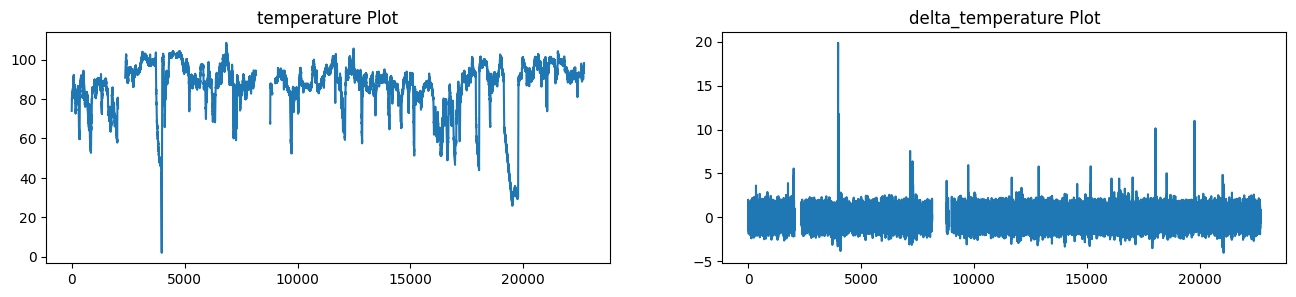

In [17]:
#Generating two separate plots for temperature and delta_temperature using  matplotlib.


# Plot temperature
plt.subplot(1, 2, 1)  # Specify the subplot arrangement
plt.plot(Data_Missing['temperature'])
plt.title('temperature Plot')

# Plot for Column2
plt.subplot(1, 2, 2)  # Specify the subplot arrangement
plt.plot(Data_Missing['delta_temperature'])
plt.title('delta_temperature Plot')

# Display the plots
plt.show()

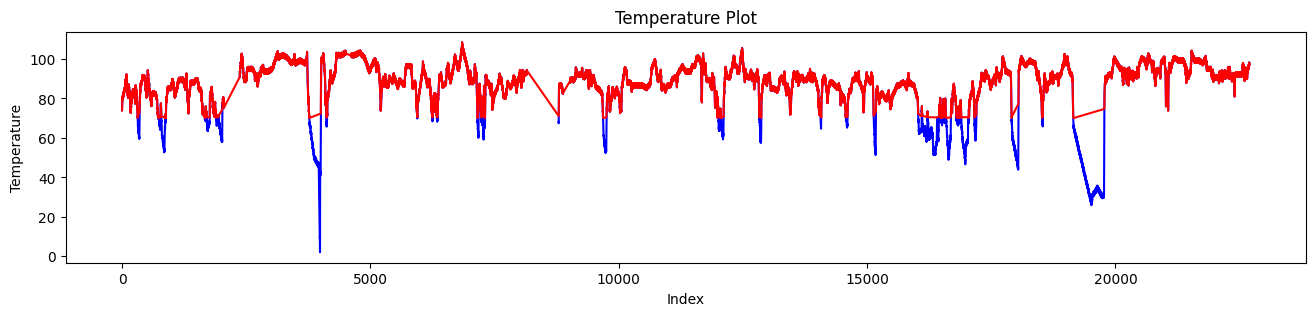

In [18]:
# Generate the plot with color differentiation
plt.plot(Data_Missing.index, Data_Missing['temperature'], linestyle='-', marker='', color='blue')  # Plot blue lines by default
plt.plot(Data_Missing[Data_Missing['temperature'] > 70.00].index, Data_Missing[Data_Missing['temperature'] > 70.00]['temperature'], linestyle='-', marker='', color='red')  # Plot red lines for values greater than 70.00

# Set the title and labels
plt.title('Temperature Plot')
plt.xlabel('Index')
plt.ylabel('Temperature')

# Show the plot
plt.show()

In [19]:
# Write three functions read_datasets(), plot_dfs(), rmse_score() for these datasets
def read_dataset(folder, file, date_col=None):
    '''
    folder: is a Path object
    file: the CSV filename in that Path object. 
    date_col: specify a date_col to use as index_col 
    
    returns: a pandas DataFrame with a DatetimeIndex
    '''
    df = pd.read_csv(folder / file, 
                     index_col=date_col, 
                     parse_dates=[date_col])
    return df
  
def plot_dfs(df1, df2, col, title=None, xlabel=None, ylabel=None):
    '''	
    df1: original dataframe without missing data
    df2: dataframe with missing data
    col: column name that contains missing data
    '''    
    df_missing = df2.rename(columns={col: 'missing'})
    
    columns = df_missing.loc[:, 'missing':].columns.tolist()
    subplots_size = len(columns)
    
    # subplots_size = df2.shape[1]
    fig, ax = plt.subplots(subplots_size+1, 1, sharex=True)
    plt.subplots_adjust(hspace=0.25)
    fig.suptitle = title 
    
    df1[col].plot(ax=ax[0], figsize=(10, 16))
    ax[0].set_title('Original Dataset')
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel(ylabel)    
    
    for i, colname in enumerate(columns):
        df_missing[colname].plot(ax=ax[i+1])
        ax[i+1].set_title(colname)

    plt.show()

def rmse_score(df1, df2, col=None):
    '''
    df1: original dataframe without missing data
    df2: dataframe with missing data
    col: column name that contains missing data

    returns: a list of scores
    '''
    df_missing = df2.rename(columns={col: 'missing'})
    columns = df_missing.loc[:, 'missing':].columns.tolist()
    scores = []
    for comp_col in columns[1:]:
        rmse = np.sqrt(np.mean((df1[col] - df_missing[comp_col])**2))
        scores.append(rmse)
        print(f'RMSE for {comp_col}: {rmse}')
    return scores


In [20]:
Data_Original.columns

Index(['timestamp', 'temperature', 'delta_temperature'], dtype='object')

In [21]:
#Dropping the column delta_temperature
Data_Original = Data_Original.drop('delta_temperature', axis=1)
Data_Missing = Data_Missing.drop('delta_temperature' , axis=1)

In [22]:
'''Perform univariate imputation on temperature and  using Pandas
 (mean, ffill, bfill) and Scikit-Learn (SimpleImputer), and interpolation. 
 Compare the RMSE score for each imputation with machine_temp_failure_original.csv  
 and find the method with the least RMSE score.'''

 #checking if there is any missing value or not
Missing_Values_1 = Data_Missing.isnull().sum()


In [23]:
print(Missing_Values_1)

timestamp         0
temperature    1285
dtype: int64


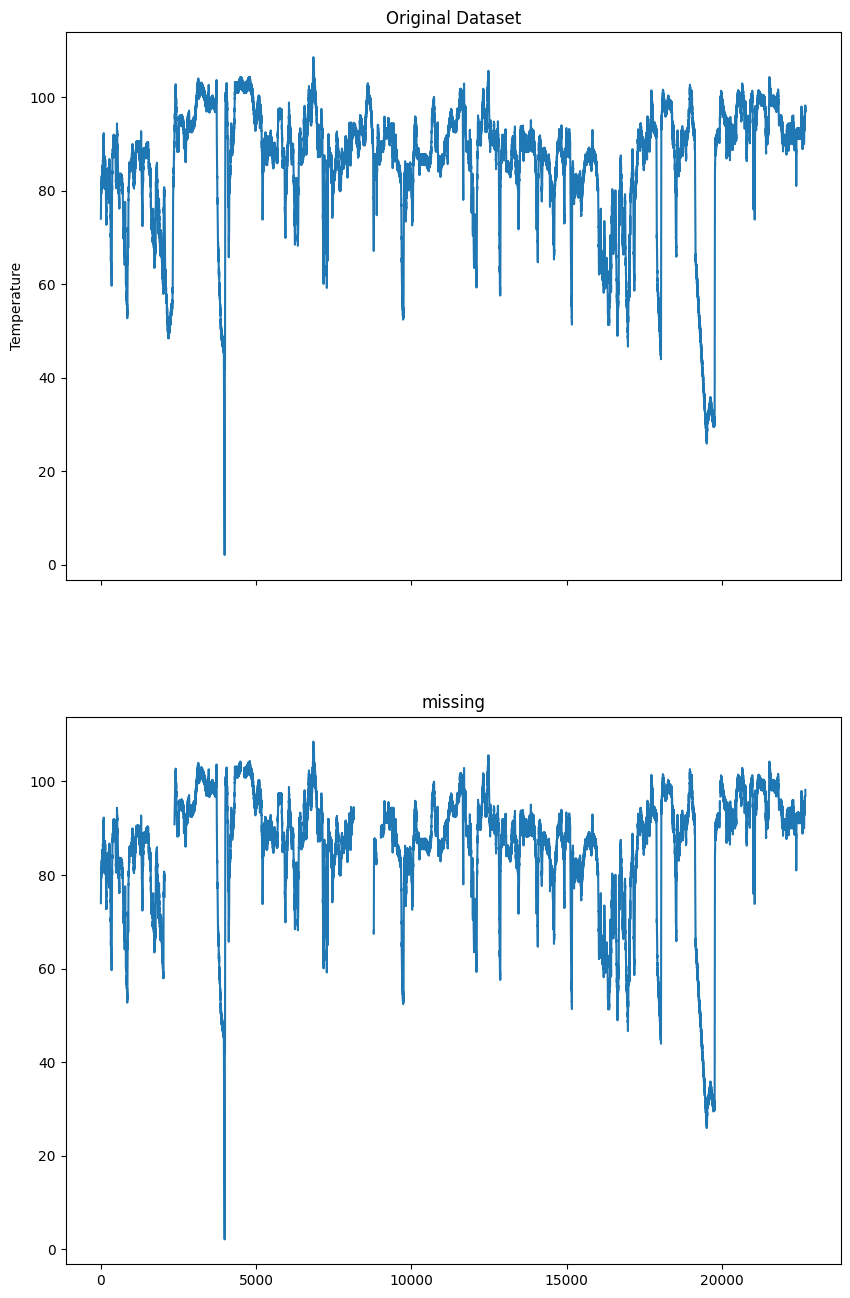

In [24]:
#Visualizing the original and missing dataset
plot_dfs(Data_Original, 
         Data_Missing, 
         'temperature',
         title="machine_temp_failure",
         xlabel="Index",
         ylabel="Temperature")

In [25]:
#Imputing the missing values using bfill,ffill,mean
Data_Missing['ffill'] = Data_Missing['temperature'].fillna(method='ffill')
Data_Missing['bfill'] = Data_Missing['temperature'].fillna(method='bfill')

In [26]:
#Calculating RMSE values for different methods
_ = rmse_score(Data_Original, 
                    Data_Missing, 
                    'temperature')

RMSE for ffill: 2.4939956524274454
RMSE for bfill: 5.873128567455812


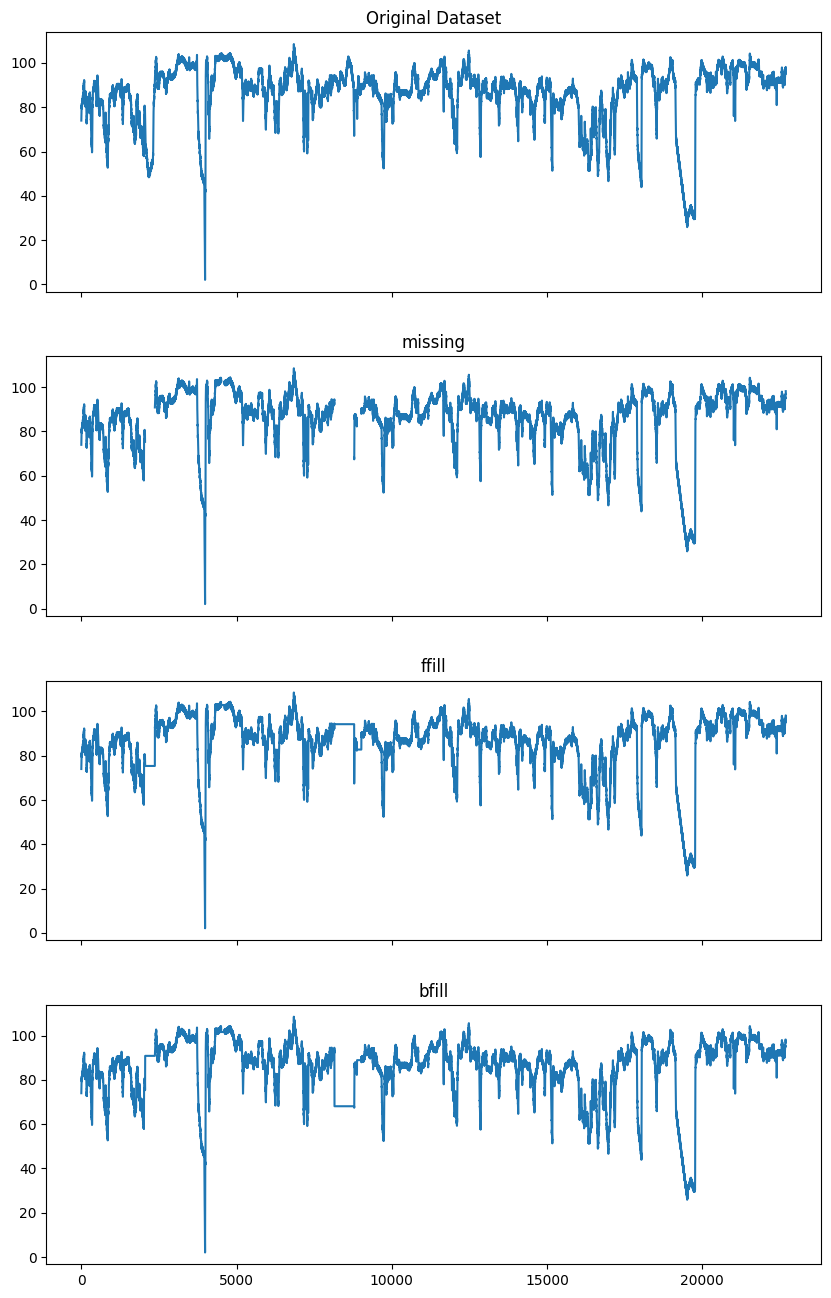

In [27]:
plot_dfs(Data_Original, Data_Missing, 'temperature')

In [28]:
strategy = [
    ('Mean Strategy', 'mean'),
    ('Median Strategy', 'median'),
    ('Most Frequent Strategy', 'most_frequent')]

In [29]:
Missing_vals = Data_Missing['temperature'].values.reshape(-1,1)
for s_name, s in strategy:
    Data_Missing[s_name] = (SimpleImputer(strategy=s).fit_transform(Missing_vals))
Data_Missing.interpolate()
 

,timestamp,temperature,ffill,bfill,Mean Strategy,Median Strategy,Most Frequent Strategy
0,02-12-2013 21:15,73.967322,73.967322,73.967322,73.967322,73.967322,73.967322
1,02-12-2013 21:20,74.935882,74.935882,74.935882,74.935882,74.935882,74.935882
2,02-12-2013 21:25,76.124162,76.124162,76.124162,76.124162,76.124162,76.124162
3,02-12-2013 21:30,78.140707,78.140707,78.140707,78.140707,78.140707,78.140707
4,02-12-2013 21:35,79.329836,79.329836,79.329836,79.329836,79.329836,79.329836
...,...,...,...,...,...,...,...
22690,19-02-2014 15:05,98.185415,98.185415,98.185415,98.185415,98.185415,98.185415
22691,19-02-2014 15:10,97.804168,97.804168,97.804168,97.804168,97.804168,97.804168
22692,19-02-2014 15:15,97.135468,97.135468,97.135468,97.135468,97.135468,97.135468
22693,19-02-2014 15:20,98.056852,98.056852,98.056852,98.056852,98.056852,98.056852


In [30]:
interpolations = [
    'linear',
    'quadratic',
    'nearest',
    'cubic'
]

for intp in interpolations:
    Data_Missing[intp] = Data_Missing['temperature'].interpolate(method=intp)
    

    Data_Missing['spline'] = \
         Data_Missing['temperature'].interpolate(method='spline', order=3)

    Data_Missing['polynomial'] = \
         Data_Missing['temperature'].interpolate(method='polynomial',order=3)




In [31]:
_ = rmse_score(Data_Original, Data_Missing, 'temperature')

RMSE for ffill: 2.4939956524274454
RMSE for bfill: 5.873128567455812
RMSE for Mean Strategy: 3.961536496226712
RMSE for Median Strategy: 4.071585793081295
RMSE for Most Frequent Strategy: 20.176855010139285
RMSE for linear: 4.043203597694257
RMSE for spline: 31.555524800844847
RMSE for polynomial: 12.63060501654674
RMSE for quadratic: 11.547623967933907
RMSE for nearest: 4.538509533797259
RMSE for cubic: 12.63060501654674


In [32]:
#the least RMSE score is for ffill

In [33]:
Data_Missing =  Data_Missing.fillna(method='ffill')

In [34]:
# Check the frequency of the dataset
frequency = Data_Missing['timestamp'].value_counts()
print("Original frequency:")
print(frequency)

Original frequency:
07-01-2014 02:45    2
07-01-2014 02:30    2
07-01-2014 02:00    2
07-01-2014 02:05    2
07-01-2014 02:15    2
                   ..
29-12-2013 02:50    1
29-12-2013 02:45    1
29-12-2013 02:40    1
29-12-2013 02:35    1
19-02-2014 15:25    1
Name: timestamp, Length: 22683, dtype: int64


In [35]:
Data_Missing.head()

,timestamp,temperature,ffill,bfill,Mean Strategy,Median Strategy,Most Frequent Strategy,linear,spline,polynomial,quadratic,nearest,cubic
0,02-12-2013 21:15,73.967322,73.967322,73.967322,73.967322,73.967322,73.967322,73.967322,73.967322,73.967322,73.967322,73.967322,73.967322
1,02-12-2013 21:20,74.935882,74.935882,74.935882,74.935882,74.935882,74.935882,74.935882,74.935882,74.935882,74.935882,74.935882,74.935882
2,02-12-2013 21:25,76.124162,76.124162,76.124162,76.124162,76.124162,76.124162,76.124162,76.124162,76.124162,76.124162,76.124162,76.124162
3,02-12-2013 21:30,78.140707,78.140707,78.140707,78.140707,78.140707,78.140707,78.140707,78.140707,78.140707,78.140707,78.140707,78.140707
4,02-12-2013 21:35,79.329836,79.329836,79.329836,79.329836,79.329836,79.329836,79.329836,79.329836,79.329836,79.329836,79.329836,79.329836


In [36]:
# Change the frequency to hourly
# Convert 'timestamp' column to datetime type
Data_Missing['timestamp'] = pd.to_datetime(Data_Missing['timestamp'])

# Resample the data to hourly frequency
Data_Missing_hourly = Data_Missing.resample('H', on='timestamp').count()
print(Data_Missing_hourly)

                     temperature  ffill  bfill  Mean Strategy  \
timestamp                                                       
2013-02-12 21:00:00            9      9      9              9   
2013-02-12 22:00:00           12     12     12             12   
2013-02-12 23:00:00           12     12     12             12   
2013-02-13 00:00:00            0      0      0              0   
2013-02-13 01:00:00            0      0      0              0   
...                          ...    ...    ...            ...   
2014-12-02 19:00:00           12     12     12             12   
2014-12-02 20:00:00           12     12     12             12   
2014-12-02 21:00:00           12     12     12             12   
2014-12-02 22:00:00           12     12     12             12   
2014-12-02 23:00:00           12     12     12             12   

                     Median Strategy  Most Frequent Strategy  linear  spline  \
timestamp                                                                 

<Axes: xlabel='temperature'>

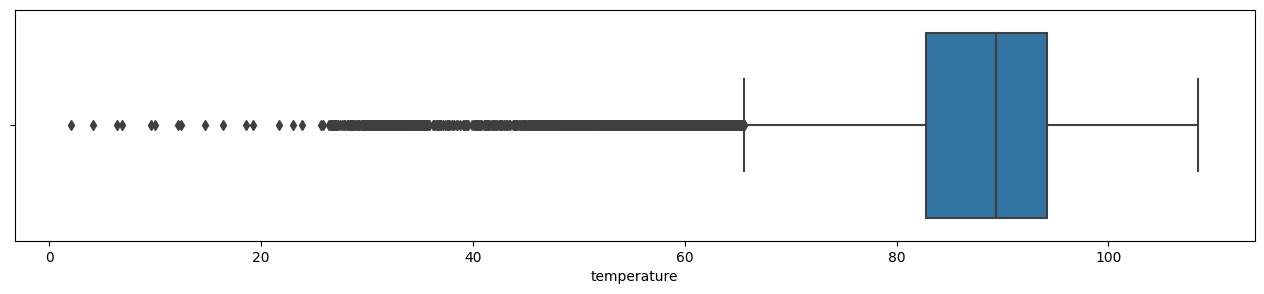

In [37]:
import seaborn as sns 
sns.boxplot(x=Data_Missing['temperature'], whis=1.5)

<Axes: xlabel='temperature'>

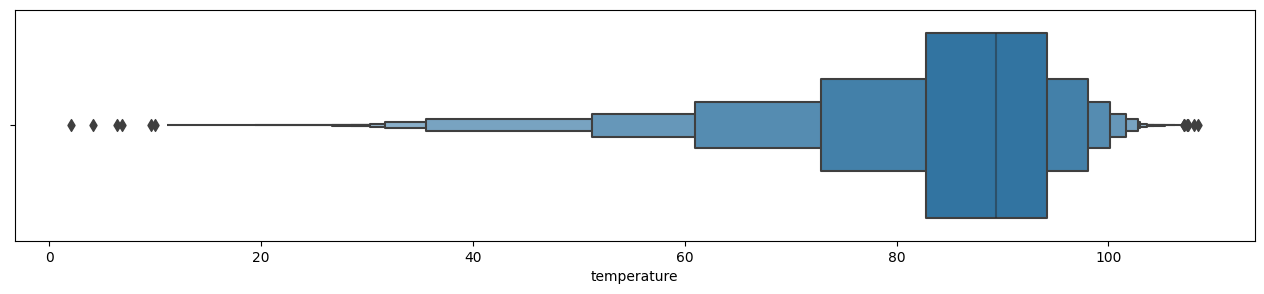

In [38]:
sns.boxenplot(x=Data_Missing['temperature'])

In [39]:
percentiles = [0, 0.05, .10, .25, .5, .75, .90, .95, 1]
Data_Missing.describe(percentiles= percentiles)


,temperature,ffill,bfill,Mean Strategy,Median Strategy,Most Frequent Strategy,linear,spline,polynomial,quadratic,nearest,cubic
count,22695.000000,22695.000000,22695.000000,22695.000000,22695.000000,22695.000000,22695.000000,22695.000000,22695.000000,22695.000000,22695.000000,22695.000000
mean,86.128962,86.128962,85.645915,85.968188,86.154078,81.218672,85.887438,81.595547,87.123890,86.823955,85.887706,87.123890
std,13.363404,13.363404,13.571443,13.163771,13.185623,23.433936,13.328446,32.661033,20.271549,19.592089,13.469924,20.271549
min,2.084721,2.084721,2.084721,2.084721,2.084721,2.084721,2.084721,-185.498468,-37.259699,-48.846447,2.084721,-37.259699
0%,2.084721,2.084721,2.084721,2.084721,2.084721,2.084721,2.084721,-185.498468,-37.259699,-48.846447,2.084721,-37.259699
5%,57.962911,57.962911,57.962911,58.077522,58.077522,2.084721,57.962911,49.050994,54.546877,54.634745,57.962911,54.546877
10%,68.585547,68.585547,68.094569,68.624662,68.624662,55.896892,68.494241,63.753174,66.496584,66.510922,68.094569,66.496584
25%,82.751587,82.751587,82.403528,83.638778,83.638778,80.890984,82.640382,81.879411,83.114549,83.111402,82.696016,83.114549
50%,89.425445,89.425445,89.121578,88.700228,89.251290,88.700228,88.988892,88.898658,89.523975,89.507725,89.267129,89.523975
75%,94.204409,94.204409,93.683583,93.485333,93.485333,93.485333,93.703383,93.680215,94.591717,94.571114,94.083684,94.591717


In [40]:
def iqr_outliers(data):
    q1, q3 = np.percentile(data['temperature'], [25, 75])
    IQR = q3 - q1
    lower_fence = q1 - (1.5 * IQR)
    upper_fence = q3 + (1.5 * IQR)
    return data[(data['temperature'] > upper_fence) | (data['temperature'] < lower_fence)]

In [41]:
Data_Missing.ffill(inplace=True)

In [42]:
outliers = iqr_outliers(Data_Missing)
print(outliers)

                timestamp  temperature      ffill      bfill  Mean Strategy  \
323   2013-04-12 00:10:00    64.925151  64.925151  64.925151      64.925151   
325   2013-04-12 00:20:00    65.076457  65.076457  65.076457      65.076457   
326   2013-04-12 00:25:00    64.436539  64.436539  64.436539      64.436539   
327   2013-04-12 00:30:00    64.225463  64.225463  64.225463      64.225463   
328   2013-04-12 00:35:00    64.673013  64.673013  64.673013      64.673013   
...                   ...          ...        ...        ...            ...   
19770 2014-09-02 11:45:00    30.975528  30.975528  30.975528      30.975528   
19771 2014-09-02 11:50:00    35.624129  35.624129  35.624129      35.624129   
19772 2014-09-02 11:55:00    43.971303  43.971303  43.971303      43.971303   
19773 2014-09-02 12:00:00    53.135749  53.135749  53.135749      53.135749   
19774 2014-09-02 12:05:00    64.134769  64.134769  64.134769      64.134769   

       Median Strategy  Most Frequent Strategy     

In [43]:

def zscore(df, degree=3):
    data = df.copy()
    data['temperature'] = pd.to_numeric(data['temperature'], errors='coerce')
    data['zscore'] = (data['temperature'] - data['temperature'].mean())/data['temperature'].std()
    outliers = data[(data['zscore'] <= -degree) | (data['zscore'] >= degree)]
    
    return outliers['temperature'], data

In [44]:
threshold = 2.5
outliers, transformed = zscore(Data_Missing, threshold)
print(transformed)

                timestamp  temperature      ffill      bfill  Mean Strategy  \
0     2013-02-12 21:15:00    73.967322  73.967322  73.967322      73.967322   
1     2013-02-12 21:20:00    74.935882  74.935882  74.935882      74.935882   
2     2013-02-12 21:25:00    76.124162  76.124162  76.124162      76.124162   
3     2013-02-12 21:30:00    78.140707  78.140707  78.140707      78.140707   
4     2013-02-12 21:35:00    79.329836  79.329836  79.329836      79.329836   
...                   ...          ...        ...        ...            ...   
22690 2014-02-19 15:05:00    98.185415  98.185415  98.185415      98.185415   
22691 2014-02-19 15:10:00    97.804168  97.804168  97.804168      97.804168   
22692 2014-02-19 15:15:00    97.135468  97.135468  97.135468      97.135468   
22693 2014-02-19 15:20:00    98.056852  98.056852  98.056852      98.056852   
22694 2014-02-19 15:25:00    96.903861  96.903861  96.903861      96.903861   

       Median Strategy  Most Frequent Strategy     

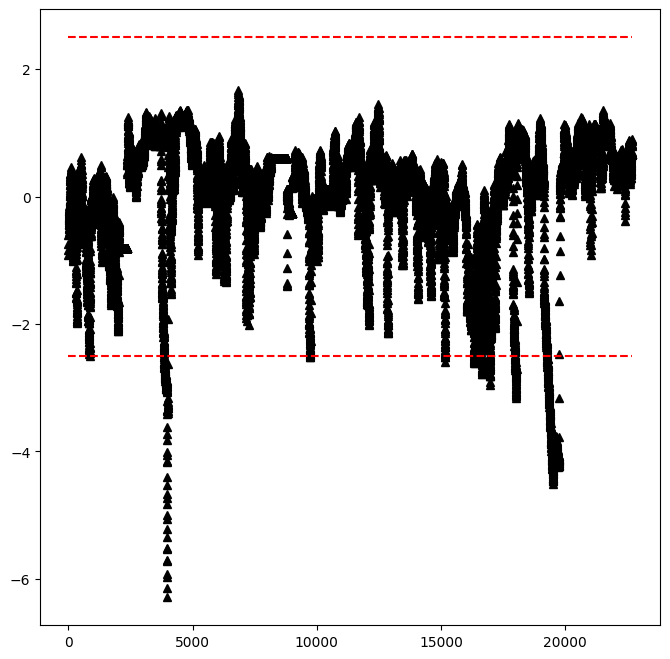

In [45]:
def plot_zscore(data, d=3):
    n = len(data)
    plt.figure(figsize=(8,8))
    plt.plot(data,'k^')
    plt.plot([0,n],[d,d],'r--')
    plt.plot([0,n],[-d,-d],'r--')
data = transformed['zscore'].values
plot_zscore(data, d=2.5)